## Prédire avec KNeighborsRegressor (méthode des k plus proches voisins) le prix d'une voiture en fonction de ses caractéristiques techniques

### Table de matières
* Importing Libraries
* Lecture du fichier de données
* Traitement des valeurs manquantes
* Normalisation des variables explicatives en utilisant Min-Max scaling
* KNeighborsRegressor (méthode des k plus proches voisins)
    * Modèle univarié avec k par defaut
    * Modèle univarié avec k non fixé
    * Modèle multivarié (toutes les colonnes et k par défaut)
    * Modèle multivarié, Variation des hyper paramètres (k) pour les 3 premières de la derniere modèle
    







#### Importing Libraries

In [7]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#### Lecture du fichier de données

In [8]:

pd.options.display.max_columns=99

cols=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
      'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
      'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars=pd.read_csv("imports-85.data", names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
# Sélection des colonnes numériques
numeric_cars=cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


#### Traitement des valeurs manquantes

In [10]:
# Remplacer les '?' par des NaN
numeric_cars=numeric_cars.replace('?', np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [11]:
# Conversion de certaines colonnes object en float
for noun_column in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    numeric_cars[noun_column]=numeric_cars[noun_column].astype('float')

In [12]:
# Types des colonnes
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [13]:
# Sélection des lignes qui ont une valeur NaN sur la colonne 'normalized-losses'
numeric_cars[pd.isnull(numeric_cars['normalized-losses'])]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,NaN,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [14]:
# Inventaire des valeurs manquantes sur chaque colonne
pd.isnull(numeric_cars).sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
# Suppression des lignes qui ont une valeur manquante sur la colonne 'price' (variable à expliquer)
numeric_cars=numeric_cars.dropna(subset=['price'])

In [16]:
# Inventaire des valeurs manquantes sur chaque colonne
pd.isnull(numeric_cars).sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [17]:
# Remplacer les valeurs manquantes par la moyenne de leur colonne respectif puis vérifier qu'il existe aucune valeur manquante
numeric_cars=numeric_cars.fillna(numeric_cars.mean())
pd.isnull(numeric_cars).sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


#### Normalisation des variables explicatives en utilisant Min-Max scaling

In [19]:
# Normaliser toutes les colonnes (sauf colonne price) de sorte que les valeurs soient comprises entre 0 et 1
liste=numeric_cars.columns.tolist()
liste.remove('price')
liste

for noun_column in liste:
    numeric_cars[noun_column]=(numeric_cars[noun_column]-numeric_cars[noun_column].min())/(numeric_cars[noun_column].max()-numeric_cars[noun_column].min())
numeric_cars    

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


#### KNeighborsRegressor (méthode des k plus proches voisins)

- **Modèle univarié avec k par defaut**

In [20]:
# Modele univarié avec k par defaut

def knn_train_test(colonne_dapprentissage, colonne_cible, df):
    
    # Randomiser l'ordre des lignes du DataFrame
    np.random.seed(0)
    ind=np.random.permutation(df.index)
    df=df.loc[ind]
    
    # Diviser le nombre de ligne à moitié
    train_df=df.iloc[0:100]
    test_df=df.iloc[100:]
    
    # Instancier le modele
    knn=KNeighborsRegressor()
    
    # Ajouter un modele knn en utilisant la valeur par de defaut k
    knn.fit(train_df[[colonne_dapprentissage]], train_df[colonne_cible])
    
    # Faire des predictions en utilisant le modele 
    predictions=knn.predict(test_df[[colonne_dapprentissage]])
    
    # Calculer et retourner la valeur de RMSE
    MSE=mean_squared_error(test_df[colonne_cible], predictions)
    RMSE=np.sqrt(MSE)
    return RMSE



In [21]:
liste=numeric_cars.columns.tolist()
liste.remove('price')
RMSEs={}
for colonne_dapprentissage in liste:
    RMSEs[colonne_dapprentissage]=knn_train_test(colonne_dapprentissage, 'price', numeric_cars)
pd.Series(RMSEs).sort_values()

engine-size          3197.380649
curb-weight          3782.517763
highway-mpg          3825.547853
width                4067.565225
city-mpg             4998.578075
horsepower           5015.709416
length               5722.180847
compression-ratio    6038.443497
wheel-base           6212.244807
bore                 6375.811122
peak-rpm             6794.853225
normalized-losses    6924.767940
stroke               7142.509829
height               7502.274571
dtype: float64

- **Modèle univarié avec k non fixé**

In [22]:
# Modele univarié avec k non fixé

def knn_train_test2(colonne_dapprentissage, colonne_cible, df, k):
    
    # Randomiser l'ordre des lignes du DataFrame
    np.random.seed(0)
    ind=np.random.permutation(df.index)
    df=df.loc[ind]
    
    # Diviser le nombre de ligne à moitié
    train_df=df.iloc[0:100]
    test_df=df.iloc[100:]
    
    # Instancier le modele
    knn=KNeighborsRegressor(n_neighbors=k)
    
    # Ajouter un modele knn en utilisant la valeur par de defaut k
    knn.fit(train_df[[colonne_dapprentissage]], train_df[colonne_cible])
    
    # Faire des predictions en utilisant le modele 
    predictions=knn.predict(test_df[[colonne_dapprentissage]])
    
    # Calculer et retourner la valeur de RMSE
    MSE=mean_squared_error(test_df[colonne_cible], predictions)
    RMSE=np.sqrt(MSE)
    return RMSE


In [25]:
liste=numeric_cars.columns.tolist()
liste.remove('price')

Mean_RMSE={}
for colonne_dapprentissage in liste:
    RMSEs={}
    tab_RMSEs=[]
    for k in [1, 3, 5, 7, 9]:
        RMSEs[k]=knn_train_test2(colonne_dapprentissage, 'price', numeric_cars, k)
        tab_RMSEs.append(knn_train_test2(colonne_dapprentissage, 'price', numeric_cars, k))
    Mean_RMSE[colonne_dapprentissage]=np.mean(tab_RMSEs)
    print(colonne_dapprentissage)
    print(pd.Series(RMSEs))
pd.Series(Mean_RMSE).sort_values()

normalized-losses
1    6057.525180
3    6596.095787
5    6924.767940
7    7120.228739
9    7348.920310
dtype: float64
wheel-base
1    6489.446552
3    7421.605070
5    6212.244807
7    5535.765316
9    5371.936991
dtype: float64
length
1    5363.785888
3    5439.629109
5    5722.180847
7    5505.055597
9    5374.873584
dtype: float64
width
1    5024.170730
3    4016.109123
5    4067.565225
7    3936.461579
9    3901.112783
dtype: float64
height
1    9700.940305
3    7730.834825
5    7502.274571
7    7222.739290
9    7315.274681
dtype: float64
curb-weight
1    5939.546599
3    4283.684945
5    3782.517763
7    3714.987693
9    4083.492355
dtype: float64
engine-size
1    3129.234001
3    3499.640896
5    3197.380649
7    3413.279762
9    3702.127589
dtype: float64
bore
1    6081.760442
3    6163.478122
5    6375.811122
7    6536.504706
9    6380.249791
dtype: float64
stroke
1    7352.975377
3    6837.739943
5    7142.509829
7    7142.183482
9    7054.477362
dtype: float64
compression-rat

engine-size          3388.332580
highway-mpg          4170.291994
width                4189.083888
curb-weight          4360.845871
city-mpg             4638.434400
horsepower           4907.446260
length               5481.105005
wheel-base           6206.199747
bore                 6307.560836
compression-ratio    6628.768854
normalized-losses    6809.507591
peak-rpm             7051.927222
stroke               7105.977199
height               7894.412734
dtype: float64

- **Modèle multivarié (toutes les colonnes et k par défaut)**

In [26]:
# Modele multivarié (toutes les colonnes et k par défaut)

def knn_train_test3(colonnes_dapprentissage, colonne_cible, df):
    
    # Randomiser l'ordre des lignes du DataFrame
    np.random.seed(0)
    ind=np.random.permutation(df.index)
    df=df.loc[ind]
    
    # Diviser le nombre de ligne à moitié
    train_df=df.iloc[0:100]
    test_df=df.iloc[100:]
    
    # Instancier le modele
    knn=KNeighborsRegressor()
    
    # Ajouter un modele knn en utilisant la valeur par de defaut k
    knn.fit(train_df[colonnes_dapprentissage], train_df[colonne_cible])
    
    # Faire des predictions en utilisant le modele 
    predictions=knn.predict(test_df[colonnes_dapprentissage])
    
    # Calculer et retourner la valeur de RMSE
    MSE=mean_squared_error(test_df[colonne_cible], predictions)
    RMSE=np.sqrt(MSE)
    return RMSE


In [27]:
# Toutes les colonnes et k par défaut
liste=numeric_cars.columns.tolist()
liste.remove('price')
toutes_les_colonnes=liste

knn_train_test3(toutes_les_colonnes, 'price', numeric_cars)

3712.664163387123

In [28]:
# RMSE obtenu sur les données test avec les 2 meilleures colonnes('highway-mpg', 'curb-weight') k par défaut
knn_train_test3(['highway-mpg', 'curb-weight'], 'price', numeric_cars)

4362.066416343756

In [29]:
# RMSE obtenu sur les données test avec les 3 meilleures colonnes('highway-mpg', 'curb-weight', 'width') k par défaut
knn_train_test3(['highway-mpg', 'curb-weight', 'width'], 'price', numeric_cars)

3495.623297555937

In [30]:
# RMSE obtenu sur les données test avec les 4 meilleures colonnes('highway-mpg', 'curb-weight', 'width', 'city-mpg') k par défaut
knn_train_test3(['highway-mpg', 'curb-weight', 'width', 'city-mpg'], 'price', numeric_cars)

3499.789211530962

In [31]:
# RMSE obtenu sur les données test avec les 5 meilleures colonnes('highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower') k par défaut
knn_train_test3(['highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower'], 'price', numeric_cars)

3486.5563456917153

In [32]:
# RMSE obtenu sur les données test avec les 6 meilleures colonnes('highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower', 'length') k par défaut
knn_train_test3(['highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower', 'length'], 'price', numeric_cars)

3589.5723535797633

- **Modèle multivarié, Variation des hyper paramètres (k) pour les 3 premières de la derniere modèle**

In [33]:
# Modele multivarié, Variation des hyper paramètres (k) pour les 3 premières de la derniere modele

def knn_train_test4(colonnes_dapprentissage, colonne_cible, df):
    tab_RMSEs=[]
    RMSEs={}
    
    np.random.seed(0)
    ind=np.random.permutation(df.index)
    df=df.loc[ind]
        
    train_df=df.iloc[0:100]
    test_df=df.iloc[100:]
    
    for k in range(1,26):
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[colonnes_dapprentissage], train_df[colonne_cible])
        predictions=knn.predict(test_df[colonnes_dapprentissage])
        
        MSE=mean_squared_error(test_df[colonne_cible], predictions)
        RMSE=np.sqrt(MSE)
        tab_RMSEs.append(RMSE)
    return tab_RMSEs

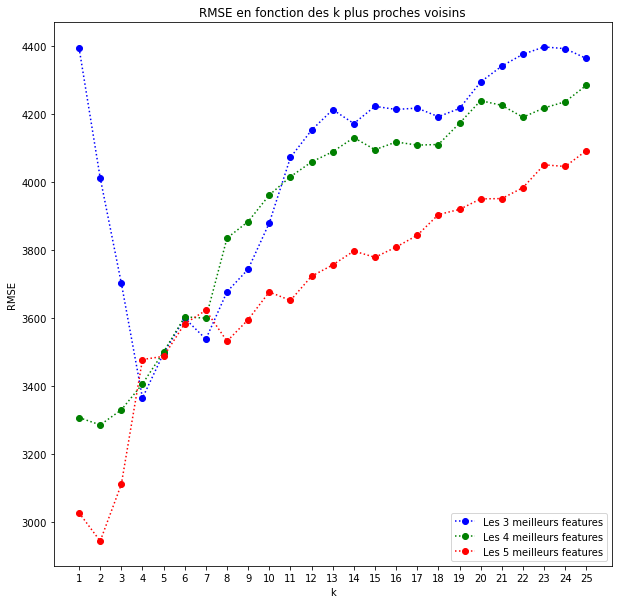

In [64]:
# Les 3 meilleures colonnes('highway-mpg', 'curb-weight', 'width') k par défaut k variant de 1 à 25
y1=knn_train_test4(['highway-mpg', 'curb-weight', 'width'], 'price', numeric_cars)

# Les 4 meilleures colonnes('highway-mpg', 'curb-weight', 'width', 'city-mpg') k par défaut k variant de 1 à 25
y2=knn_train_test4(['highway-mpg', 'curb-weight', 'width', 'city-mpg'], 'price', numeric_cars)

# Les 5 meilleures colonnes('highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower') k variant de 1 à 25
y3=knn_train_test4(['highway-mpg', 'curb-weight', 'width', 'city-mpg', 'horsepower'], 'price', numeric_cars)

# Plot
x = [i for i in range(1,26)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(x, y1, 'b:o', label='Les 3 meilleurs features')
ax.plot(x, y2, 'g:o', label='Les 4 meilleurs features')
ax.plot(x, y3, 'r:o', label='Les 5 meilleurs features')

ax.set_xlabel('k')
ax.set_ylabel('RMSE')
# ax.set_xticks(xValues = x, minor=True)
ax.set_xticks(x, labels=x)

ax.set_title('RMSE en fonction des k plus proches voisins')
leg = ax.legend();

**Conclusion : Dans le cas du modèle multivarié, on obtient un meilleur score (RMSE) avec les 5 meilleurs features (courbe rouge) lorsque k = 2.**